In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\ozcan\OneDrive\Masaüstü\Womens Clothing E-Commerce Reviews.csv")
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


Clothing ID: Integer Categorical variable that refers to the specific piece being reviewed.
Age: Positive Integer variable of the reviewers age.
Title: String variable for the title of the review.
Review Text: String variable for the review body.
Rating: Positive Ordinal Integer variable for the product score granted by the customer from 1 Worst, to 5 Best.
Recommended IND: Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.
Positive Feedback Count: Positive Integer documenting the number of other customers who found this review positive.
Division Name: Categorical name of the product high level division.
Department Name: Categorical name of the product department name.
Class Name: Categorical name of the product class name.

In [3]:
df.drop("Unnamed: 0",inplace=True, axis = 1)

In [4]:
df.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [5]:
df.isnull().sum()

Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

In [6]:
df.shape # we got 23486 observation

(23486, 10)

In [7]:
df[df["Division Name"].isnull()]
null_index = df[df["Division Name"].isnull()].index

In [8]:
df.drop(null_index,inplace=True,axis=0)

In [9]:
df.isnull().sum()

Clothing ID                   0
Age                           0
Title                      3809
Review Text                 844
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                 0
Department Name               0
Class Name                    0
dtype: int64

In [10]:
null_text_index = df[(df["Title"].isnull()) | (df["Review Text"].isnull())].index
df.drop(null_text_index,inplace=True,axis=0)

In [11]:
df.isnull().sum()

Clothing ID                0
Age                        0
Title                      0
Review Text                0
Rating                     0
Recommended IND            0
Positive Feedback Count    0
Division Name              0
Department Name            0
Class Name                 0
dtype: int64

In [12]:
df.shape

(19662, 10)

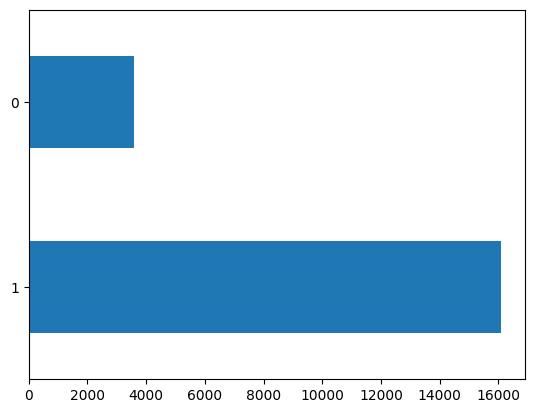

In [95]:
df["Recommended IND"].value_counts().plot(kind = "barh")
plt.show()

TEXT PREPROCESS

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
import re, string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from nltk.corpus import wordnet
from nltk.stem import PorterStemmer,WordNetLemmatizer


In [15]:
ps = PorterStemmer()
def preprocess(text):
    text = text.lower() 
    text=text.strip()  
    text=re.compile('<.*?>').sub('', text) 
    text = re.compile('[%s]' % re.escape(string.punctuation)).sub(' ', text)  
    text = re.sub('\s+', ' ', text)  
    text = re.sub(r'\[[0-9]*\]',' ',text) 
    text=re.sub(r'[^\w\s]', '', str(text).lower().strip())
    text = re.sub(r'\d',' ',text) 
    text = re.sub(r'\s+',' ',text) 
    return text

def stopword(string):
    m_words = [i for i in string.split() if i not in stopwords.words("english")]
    return " ".join(m_words)

wnl = WordNetLemmatizer()
def lemmitizer(string):
    lemmitize = [wnl.lemmatize(w) for w in string.split(" ")]
    return " ".join(lemmitize)


def stemmer(string):
    stemmed_words = [ps.stem(w) for w in string.split(" ")]
    return " ".join(stemmed_words)

def finalpreprocess(string):
    return stemmer(lemmitizer(stopword(preprocess(string))))

In [16]:
df["processed_text"] = df["Review Text"].apply(lambda x : finalpreprocess(x))

In [17]:
df["processed_title"] = df["Title"].apply(lambda x : finalpreprocess(x))

In [18]:
df

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,processed_text,processed_title
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,high hope dress realli want work initi order p...,major design flaw
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,love love love jumpsuit fun flirti fabul everi...,favorit buy
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,shirt flatter due adjust front tie perfect len...,flatter shirt
5,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses,love traci rees dress one petit foot tall usua...,petit
6,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits,ade basket hte last mintu see would look like ...,cagrcoal shimmer fun
...,...,...,...,...,...,...,...,...,...,...,...,...
23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses,happi snag dress great price easi slip flatter...,great dress mani occas
23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits,remind matern cloth soft stretchi shini materi...,wish made cotton
23483,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses,fit well top see never would work glad abl tri...,cute see
23484,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses,bought dress wed summer cute unfortun fit perf...,cute dress perfect summer parti


VISUALIZATION

In [19]:
cv = CountVectorizer(stop_words="english",ngram_range=(2,2))

In [20]:
matrix = cv.fit_transform(df[df['Recommended IND']==0]["Title"])
freqs = zip(cv.get_feature_names_out(), matrix.sum(axis=0).tolist()[0])    
# sort from largest to smallest
print("Top 20 words used for Negative reviews.")
print(sorted(freqs, key=lambda x: -x[1])[:20])

Top 20 words used for Negative reviews.
[('wanted love', 88), ('poor quality', 61), ('runs small', 45), ('runs large', 29), ('didn work', 26), ('odd fit', 24), ('weird fit', 20), ('wanted like', 17), ('beautiful dress', 16), ('cute dress', 16), ('poor fit', 16), ('really wanted', 16), ('way big', 16), ('poor execution', 15), ('strange fit', 15), ('just ok', 14), ('high hopes', 13), ('just okay', 13), ('beautiful color', 12), ('design poor', 12)]


In [21]:
matrix = cv.fit_transform(df[df['Recommended IND']==1]["Title"])
freqs = zip(cv.get_feature_names_out(), matrix.sum(axis=0).tolist()[0])    
# sort from largest to smallest
print("Top 20 words used for Positive reviews.")
print(sorted(freqs, key=lambda x: -x[1])[:20])

Top 20 words used for Positive reviews.
[('love love', 188), ('super cute', 152), ('beautiful dress', 145), ('great dress', 140), ('love dress', 140), ('runs small', 130), ('runs large', 128), ('summer dress', 113), ('great fit', 102), ('perfect summer', 90), ('new favorite', 88), ('cute comfy', 76), ('great summer', 62), ('perfect fall', 55), ('cute dress', 53), ('runs big', 52), ('great shirt', 49), ('better person', 46), ('gorgeous dress', 45), ('great casual', 45)]


VISUALIZATION

In [22]:
departments = df["Department Name"].unique()
departments = departments.tolist()
departments

['Dresses', 'Bottoms', 'Tops', 'Intimate', 'Jackets', 'Trend']

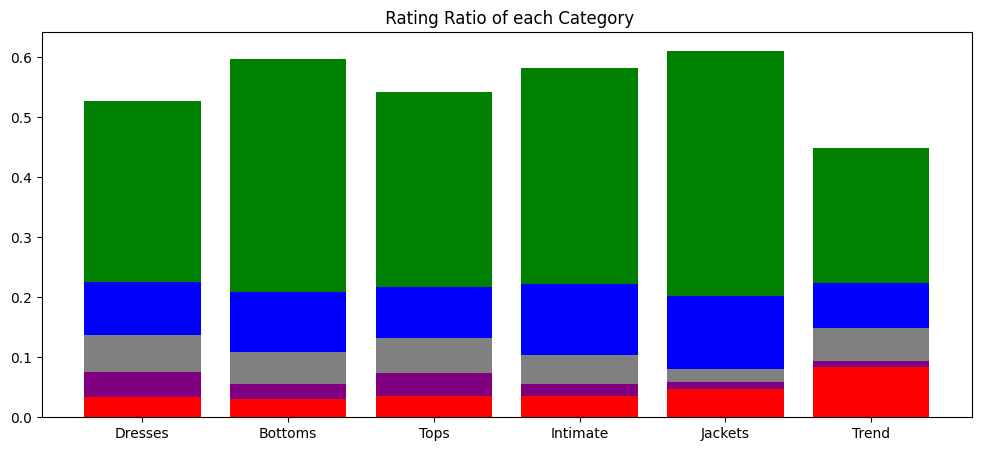

In [23]:
plt.figure(figsize=(12,5))
colors = ["green", "blue", "grey", "purple", "red"]
for department  in departments:
    ratios  = (df[df["Department Name"]==department]["Rating"].value_counts()/df[df["Department Name"]==department].shape[0])
    a,b,c,d,e = (ratios.to_list())
    plt.bar(department,a,color = colors[0])
    plt.bar(department,b,color = colors[1])
    plt.bar(department,c,color = colors[2])
    plt.bar(department,d,color = colors[3])
    plt.bar(department,e,color = colors[4])


    
    plt.title(" Rating Ratio of each Category")
    

WORD CLOUD

In [24]:
from wordcloud import WordCloud, STOPWORDS 
from PIL import Image,ImageDraw,ImageFont

In [25]:
pos_text = " ".join(item for item in df[df["Recommended IND"]==1]["Title"])

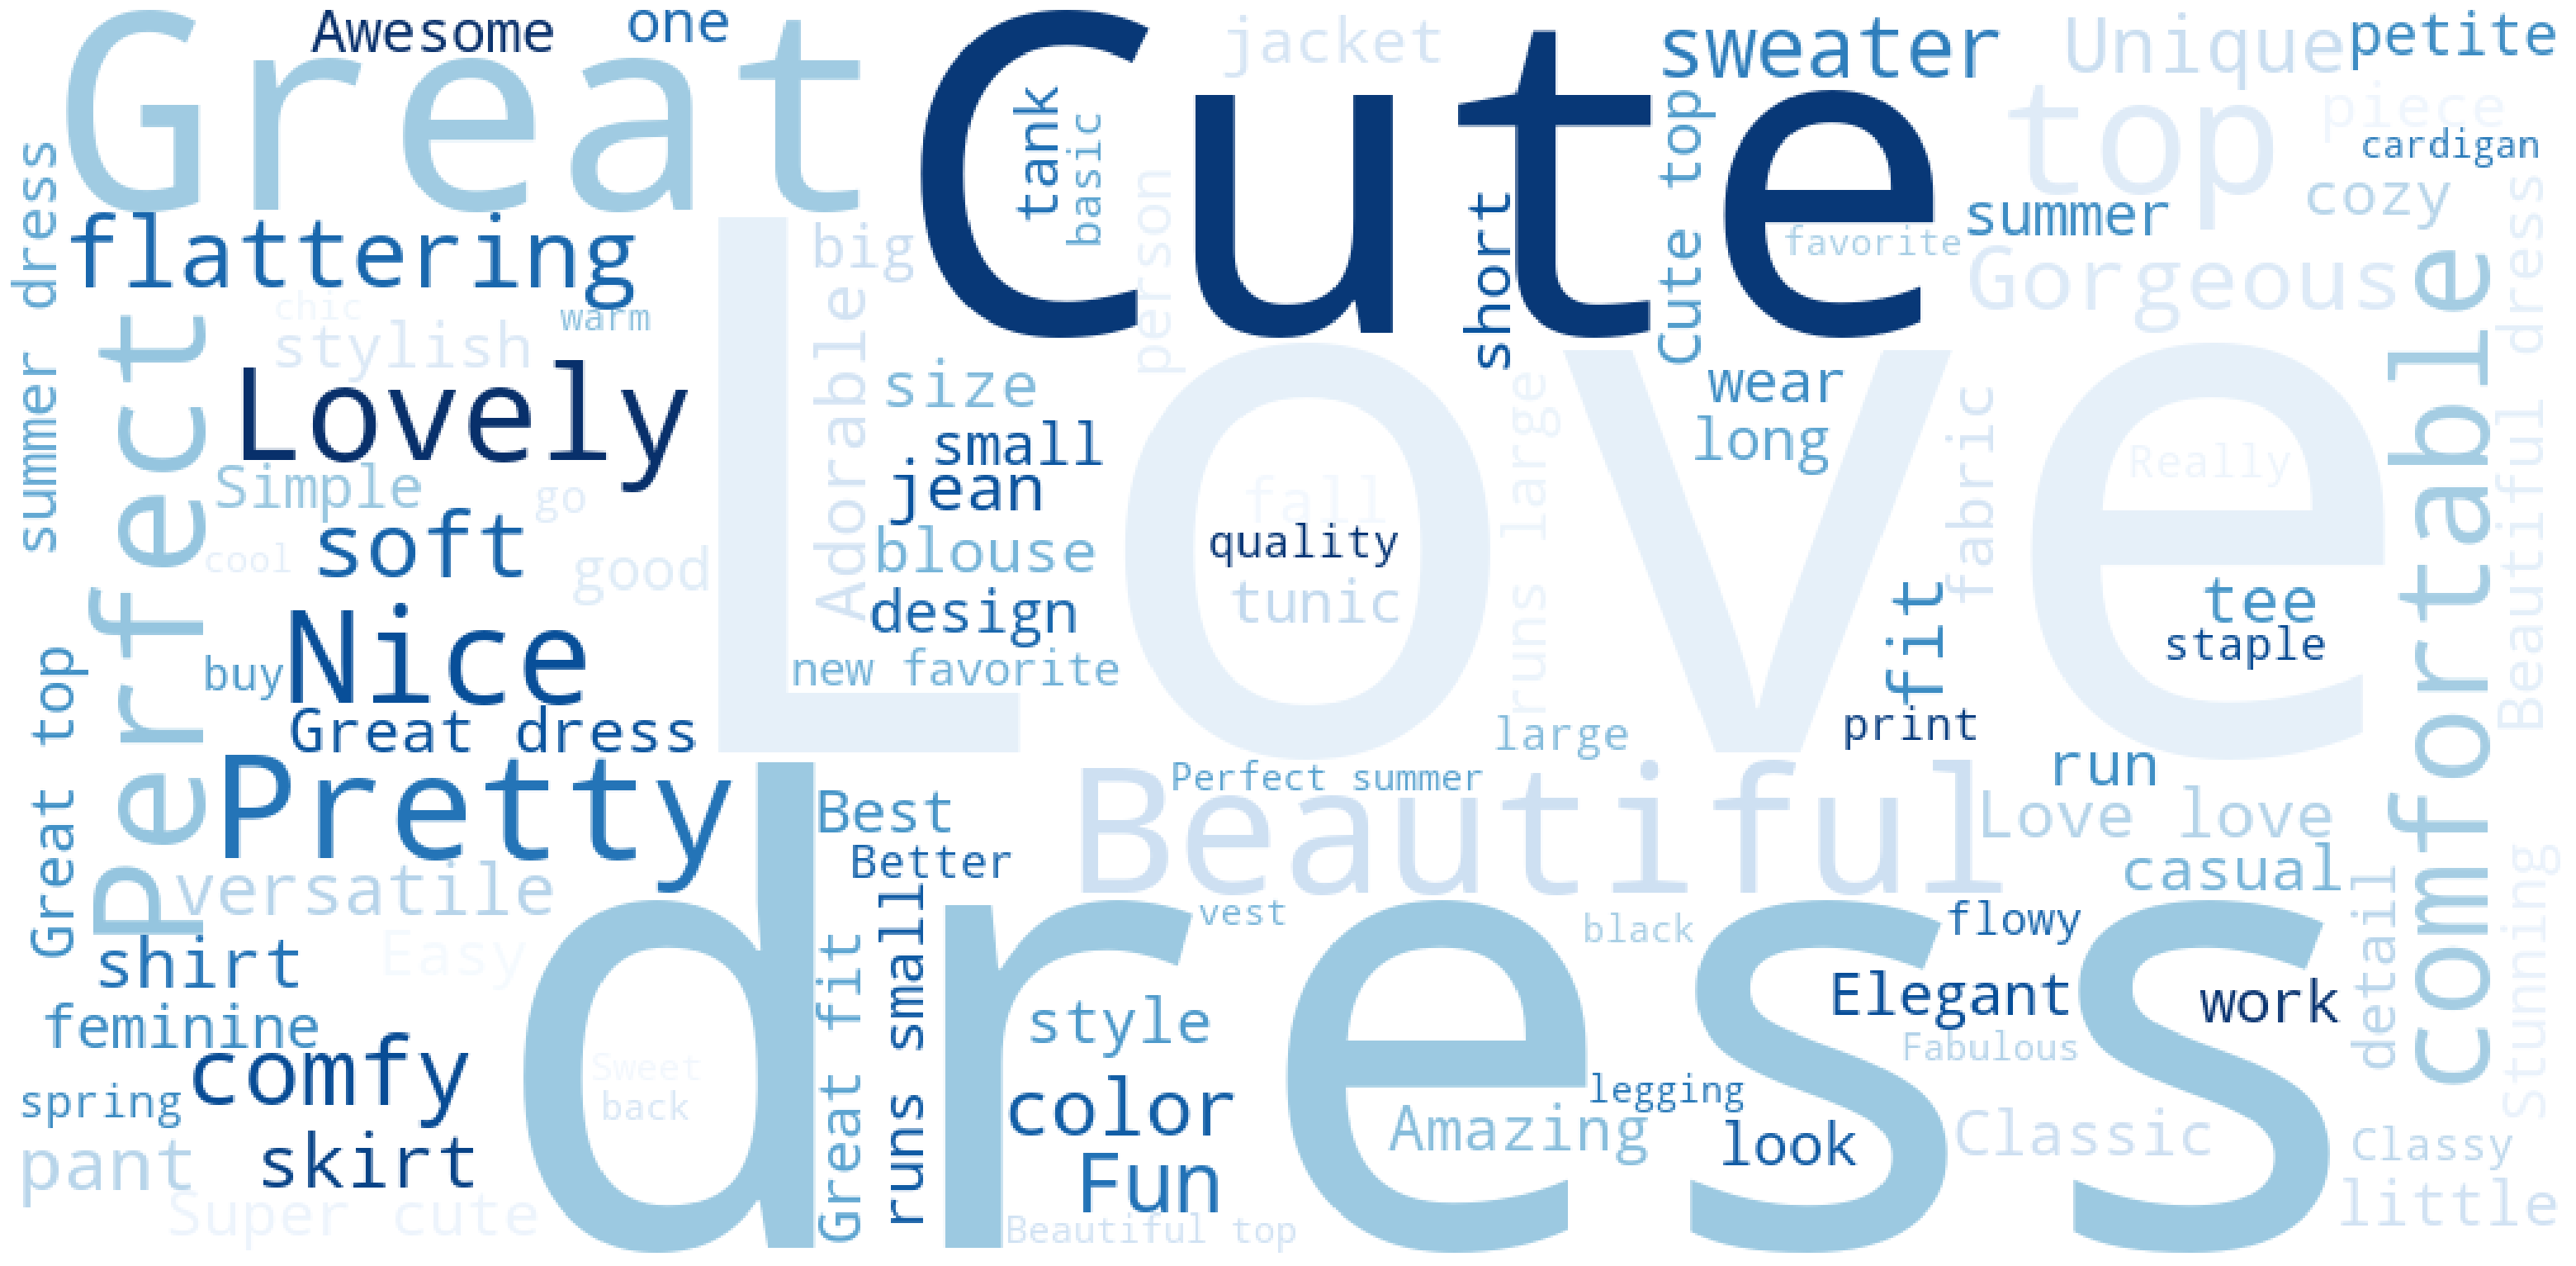

In [26]:
wordcloud = WordCloud(background_color="white", 
                      max_words=100,
                      max_font_size=300,
                      width=1024, 
                      height=500,
                      colormap="Blues").generate(pos_text )
# text is the input to the generate() method
#draw the figure
#Set figure size
plt.figure(figsize=(40, 30))
# Display image
plt.imshow(wordcloud) 
# No axis 
plt.axis("off")
plt.show()

In [27]:
neg_text = " ".join(item for item in df[df["Recommended IND"]==0]["Title"])

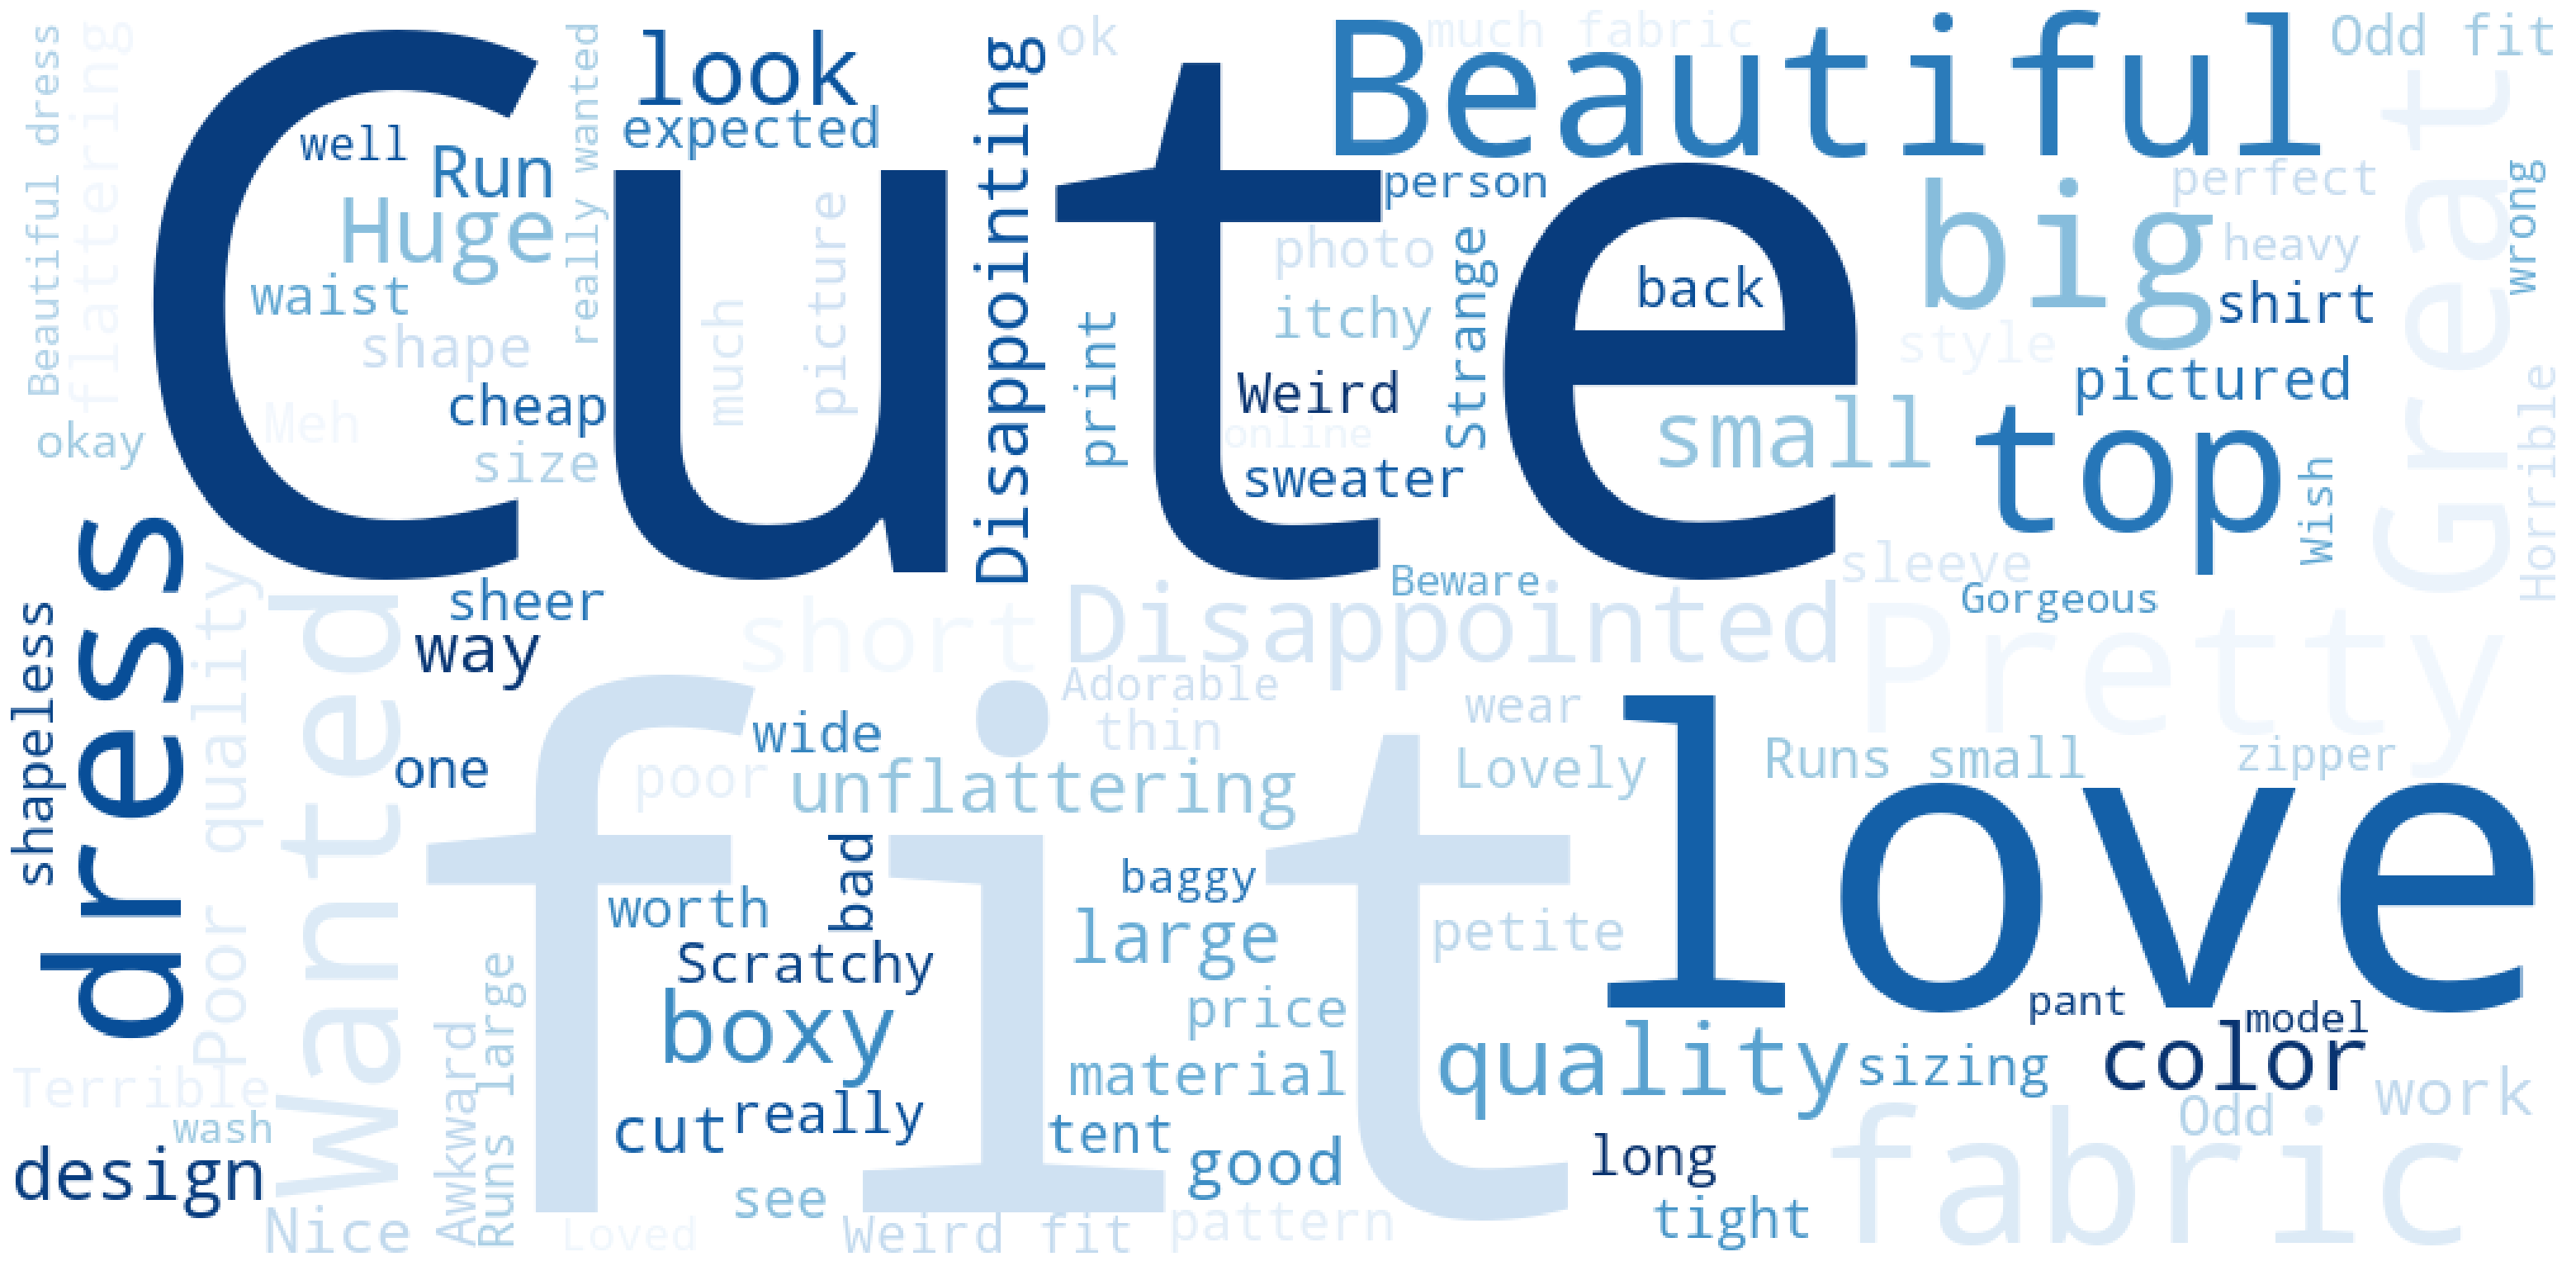

In [28]:
wordcloud = WordCloud(background_color="white", 
                      max_words=100,
                      max_font_size=300,
                      width=1024, 
                      height=500,
                      colormap="Blues").generate(neg_text)
# text is the input to the generate() method
#draw the figure
#Set figure size
plt.figure(figsize=(40, 30))
# Display image
plt.imshow(wordcloud) 
# No axis 
plt.axis("off")
plt.show()

In [29]:
from sklearn.preprocessing import LabelEncoder

In [30]:
df_encoding = df.copy()
df_encoding

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,processed_text,processed_title
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,high hope dress realli want work initi order p...,major design flaw
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,love love love jumpsuit fun flirti fabul everi...,favorit buy
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,shirt flatter due adjust front tie perfect len...,flatter shirt
5,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses,love traci rees dress one petit foot tall usua...,petit
6,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits,ade basket hte last mintu see would look like ...,cagrcoal shimmer fun
...,...,...,...,...,...,...,...,...,...,...,...,...
23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses,happi snag dress great price easi slip flatter...,great dress mani occas
23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits,remind matern cloth soft stretchi shini materi...,wish made cotton
23483,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses,fit well top see never would work glad abl tri...,cute see
23484,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses,bought dress wed summer cute unfortun fit perf...,cute dress perfect summer parti


In [31]:
df.corr() # Rating has almost 0.8 correlation with target variable. I didn't use it and try to see the performance of text classification.

C:\Users\ozcan\AppData\Local\Temp\ipykernel_24060\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count
Clothing ID,1.000000,0.012547,-0.013529,-0.012949,0.041300
Age,0.012547,1.000000,0.034910,0.035407,0.041167
Rating,-0.013529,0.034910,1.000000,0.793145,-0.056659
Recommended IND,-0.012949,0.035407,0.793145,1.000000,-0.059452
Positive Feedback Count,0.041300,0.041167,-0.056659,-0.059452,1.000000


In [32]:
label_encoder  = LabelEncoder()

In [33]:
X= df_encoding[["processed_text","processed_title","Positive Feedback Count"]]
y = df_encoding["Recommended IND"].values

In [34]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

X_train, X_test, y_train, y_test =  train_test_split(X, y , test_size= 0.3, random_state= 101)

vectorize the text input

In [35]:
from sklearn.metrics import roc_auc_score


In [36]:
# Define the column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('text1', TfidfVectorizer(max_df=0.3), 'processed_text'),
        ('text2', TfidfVectorizer(max_df=0.3), 'processed_title'),
        ('category2', 'passthrough', ['Positive Feedback Count'])
    ],
    remainder='drop'
)

# Create a pipeline with the column transformer
pipeline = Pipeline([
    ('preprocessor', preprocessor)
])

# Fit and transform the training data
X_train_transformed = pipeline.fit_transform(X_train[['processed_text', 'processed_title', 'Positive Feedback Count']])


# Transform the test data
X_test_transformed = pipeline.transform(X_test[['processed_text', 'processed_title', 'Positive Feedback Count']])


In [37]:
X_train_transformed

<13763x10110 sparse matrix of type '<class 'numpy.float64'>'
	with 367981 stored elements in Compressed Sparse Row format>

In [38]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,accuracy_score,classification_report,make_scorer,precision_score,f1_score,recall_score
# define this function to visualize confusion matrix
def plot_confusion_matrix(y_true,preds):
    
    cm = confusion_matrix(y_true, preds )
    cmd = ConfusionMatrixDisplay(cm)
    cmd.plot(cmap=plt.cm.Blues, colorbar=True)
    plt.show()

Logistic Regression

In [39]:
from sklearn.linear_model import LogisticRegression
logreg_model = LogisticRegression()

# Define the hyperparameter grid to search
param_grid = {
    'C': np.logspace(-3, 3, 7),  # Regularization parameter
    'penalty': ['l1', 'l2'],  # Regularization type
    'solver': ['liblinear']  # Optimization algorithm
}

# Create the GridSearchCV object
lr = GridSearchCV(estimator=logreg_model, param_grid=param_grid, cv=5, scoring="f1")

# Fit the grid search to the data
lr.fit(X_train_transformed, y_train)

lr_predicts = lr.predict(X_test_transformed)

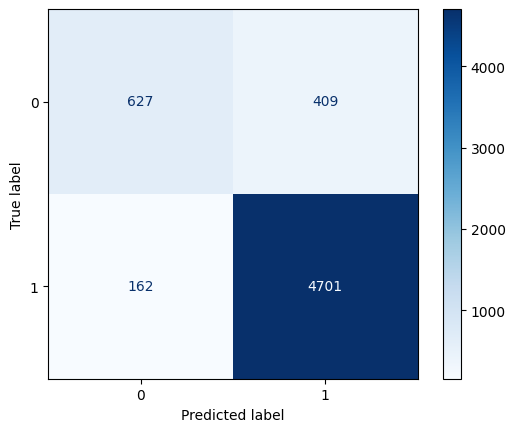

              precision    recall  f1-score   support

           0       0.79      0.61      0.69      1036
           1       0.92      0.97      0.94      4863

    accuracy                           0.90      5899
   macro avg       0.86      0.79      0.81      5899
weighted avg       0.90      0.90      0.90      5899



In [40]:
plot_confusion_matrix(y_test,lr_predicts)
print(classification_report(y_test,lr_predicts))

In [41]:
lr.best_params_

{'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}

In [42]:
roc_auc_score(y_test,lr_predicts)

0.7859497926586144

Neural Network

In [52]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score
from keras.regularizers import l2,l1
from tensorflow.keras.utils import plot_model
import tensorflow as tf

In [53]:
X_train_transformed.shape[1]

10110

In [54]:
# Neural network model
model = Sequential()
model.add(Dense(500,  kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01),input_dim=X_train_transformed.shape[1], activation='relu'))

model.add(Dense(250, kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01), activation='relu'))

model.add(Dropout(0.5))
model.add(Dense(125, kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01), activation='relu'))

model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))  

# Compile the model
model.compile(optimizer="adam", loss='binary_crossentropy', metrics=["accuracy"])

# Train the model
history = model.fit(X_train_transformed.toarray(), y_train, epochs=50,
          batch_size=128,
          validation_data=(X_test_transformed.toarray(), y_test))

Epoch 1/50
108/108 [==============================] - 4s 31ms/step - loss: 2.5340 - accuracy: 0.8125 - val_loss: 0.5643 - val_accuracy: 0.8244
Epoch 2/50
108/108 [==============================] - 3s 28ms/step - loss: 0.4985 - accuracy: 0.8366 - val_loss: 0.4582 - val_accuracy: 0.8793
Epoch 3/50
108/108 [==============================] - 3s 28ms/step - loss: 0.4499 - accuracy: 0.8694 - val_loss: 0.4358 - val_accuracy: 0.8652
Epoch 4/50
108/108 [==============================] - 3s 27ms/step - loss: 0.4295 - accuracy: 0.8814 - val_loss: 0.4086 - val_accuracy: 0.8910
Epoch 5/50
108/108 [==============================] - 3s 27ms/step - loss: 0.4170 - accuracy: 0.8903 - val_loss: 0.4130 - val_accuracy: 0.8793
Epoch 6/50
108/108 [==============================] - 3s 28ms/step - loss: 0.4035 - accuracy: 0.8915 - val_loss: 0.3913 - val_accuracy: 0.8878
Epoch 7/50
108/108 [==============================] - 3s 28ms/step - loss: 0.3881 - accuracy: 0.8981 - val_loss: 0.3889 - val_accuracy: 0.8927

In [55]:
weights  = {0:20, 1: 1}
history_weighted = model.fit(X_train_transformed.toarray(), y_train, epochs=50,class_weight=weights,
                             batch_size=100,
          
          validation_data=(X_test_transformed.toarray(), y_test))

Epoch 1/50
138/138 [==============================] - 4s 28ms/step - loss: 1.2417 - accuracy: 0.8096 - val_loss: 0.9944 - val_accuracy: 0.8052
Epoch 2/50
138/138 [==============================] - 4s 29ms/step - loss: 0.9837 - accuracy: 0.8789 - val_loss: 0.7615 - val_accuracy: 0.8615
Epoch 3/50
138/138 [==============================] - 4s 29ms/step - loss: 0.8081 - accuracy: 0.9043 - val_loss: 0.8493 - val_accuracy: 0.8379
Epoch 4/50
138/138 [==============================] - 4s 28ms/step - loss: 0.7410 - accuracy: 0.9167 - val_loss: 0.8621 - val_accuracy: 0.8266
Epoch 5/50
138/138 [==============================] - 4s 30ms/step - loss: 0.6533 - accuracy: 0.9293 - val_loss: 0.8295 - val_accuracy: 0.8449
Epoch 6/50
138/138 [==============================] - 4s 28ms/step - loss: 0.6171 - accuracy: 0.9347 - val_loss: 0.7445 - val_accuracy: 0.8656
Epoch 7/50
138/138 [==============================] - 4s 28ms/step - loss: 0.6261 - accuracy: 0.9326 - val_loss: 0.8739 - val_accuracy: 0.8315

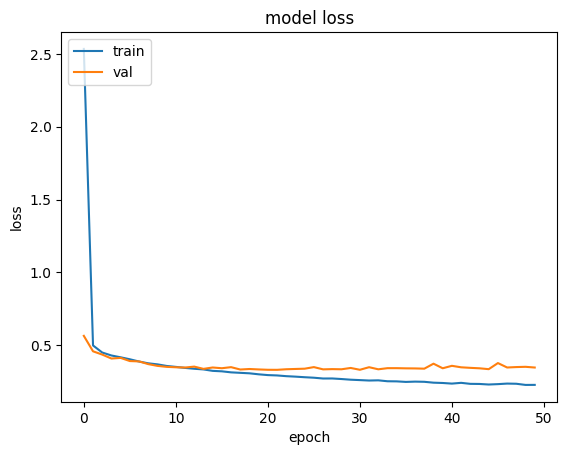

In [56]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

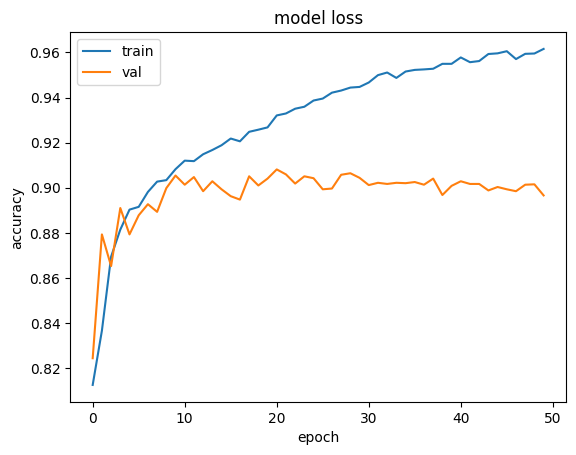

In [57]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model loss')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [58]:
plot_model(model, show_shapes = True )

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


185/185 [==============================] - 1s 3ms/step


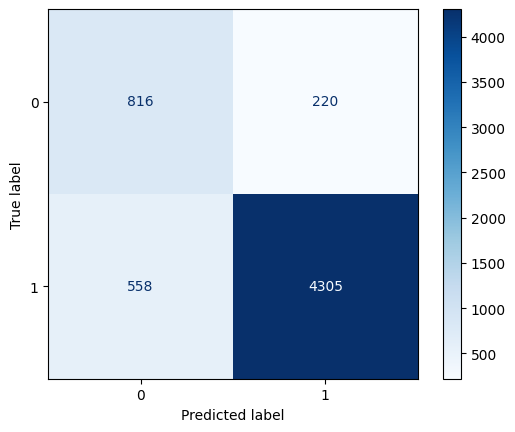

              precision    recall  f1-score   support

           0       0.59      0.79      0.68      1036
           1       0.95      0.89      0.92      4863

    accuracy                           0.87      5899
   macro avg       0.77      0.84      0.80      5899
weighted avg       0.89      0.87      0.87      5899



In [59]:
y_pred = np.round(model.predict(X_test_transformed.toarray())).astype(int)
plot_confusion_matrix(y_test,y_pred )
print(classification_report(y_test, y_pred ))

In [60]:
roc_auc_score(y_test,y_pred)

0.8364504012252315

In [61]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
base_estimator = DecisionTreeClassifier()

ADABOOST

In [62]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
base_estimator = DecisionTreeClassifier()

# Define the AdaBoost model
adaboost_model = AdaBoostClassifier(estimator=base_estimator)

# Define the hyperparameter grid to search
param_grid = {
    'n_estimators': [50, 100, 200],    # Number of weak learners
    'learning_rate': [0.01, 0.1, 0.5]  # Learning rate
}

# Create the GridSearchCV object
ada = GridSearchCV(estimator=adaboost_model, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
ada.fit(X_train_transformed, y_train)

# Get the best hyperparameters
best_params = ada.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model
best_model = ada.best_estimator_

# Make predictions on the test set
ada_pred = best_model.predict(X_test_transformed)

Best Hyperparameters: {'learning_rate': 0.01, 'n_estimators': 50}


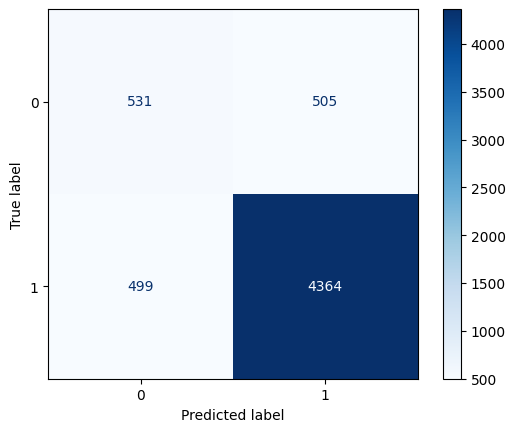

              precision    recall  f1-score   support

           0       0.52      0.51      0.51      1036
           1       0.90      0.90      0.90      4863

    accuracy                           0.83      5899
   macro avg       0.71      0.70      0.71      5899
weighted avg       0.83      0.83      0.83      5899

0.7049683529479951


In [63]:
plot_confusion_matrix(y_test,ada_pred)
print(classification_report(y_test, ada_pred))
print(roc_auc_score(y_test,ada_pred))

RANDOM FOREST

Best Hyperparameters: {'max_features': 'sqrt', 'n_estimators': 50}
              precision    recall  f1-score   support

           0       0.83      0.31      0.45      1036
           1       0.87      0.99      0.92      4863

    accuracy                           0.87      5899
   macro avg       0.85      0.65      0.68      5899
weighted avg       0.86      0.87      0.84      5899



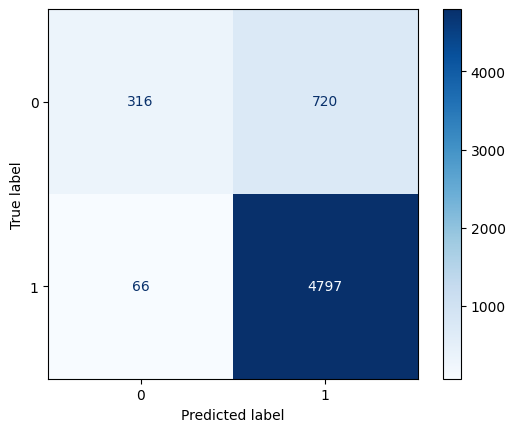

In [64]:
rf_model = RandomForestClassifier()

# Define the hyperparameter grid to search
param_grid = {
    'n_estimators': [50, 100, 200],   
    "max_features" : ["auto","sqrt"]
                   
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, scoring="accuracy",n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train_transformed, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model
rf = grid_search.best_estimator_

# Make predictions on the test set
rf_preds = rf.predict(X_test_transformed)

print(classification_report(y_test,rf_preds))
plot_confusion_matrix(y_test,rf_preds)


In [65]:
print(roc_auc_score(y_test, rf_preds))

0.6457237179013859


Naive Bayes:

              precision    recall  f1-score   support

           0       0.88      0.33      0.48      1036
           1       0.87      0.99      0.93      4863

    accuracy                           0.87      5899
   macro avg       0.88      0.66      0.70      5899
weighted avg       0.87      0.87      0.85      5899



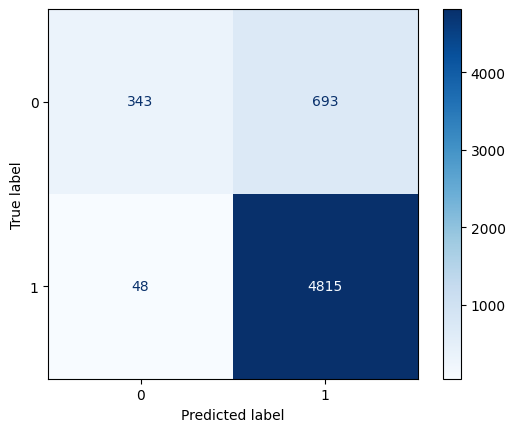

0.6606053153708922


In [66]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()

nb.fit(X_train_transformed,y_train)


nb_preds = nb.predict(X_test_transformed)

print(classification_report(y_test,nb_preds))
plot_confusion_matrix(y_test,nb_preds)
print(roc_auc_score(y_test,nb_preds))

SVM


In [67]:
from sklearn.svm import SVC

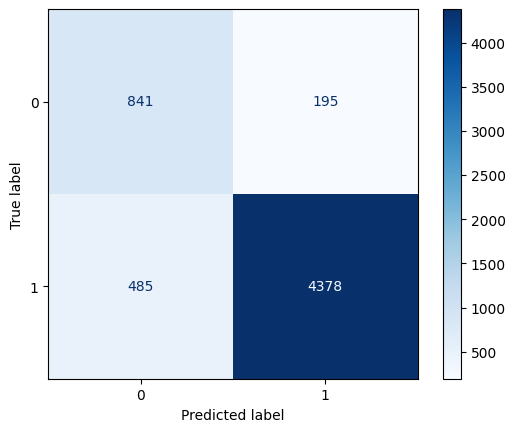

              precision    recall  f1-score   support

           0       0.63      0.81      0.71      1036
           1       0.96      0.90      0.93      4863

    accuracy                           0.88      5899
   macro avg       0.80      0.86      0.82      5899
weighted avg       0.90      0.88      0.89      5899



In [68]:
param_grid = {
           # Regularization parameter
    'kernel': ['linear'], 
    "C":[0.1,1,10],
    "gamma":[1,0.1,0.01]} # Kernel type: linear, radial basis function (RBF), polynomial
svm = SVC( class_weight="balanced")


svm_grid = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5, scoring='f1')

# Fit the grid search to the data
svm_grid.fit(X_train_transformed, y_train)


# Get the best model
best_model_svm = svm_grid.best_estimator_

# Make predictions on the test set
svm_preds = best_model_svm.predict(X_test_transformed)

plot_confusion_matrix(y_test,svm_preds)
print(classification_report(y_test, svm_preds))

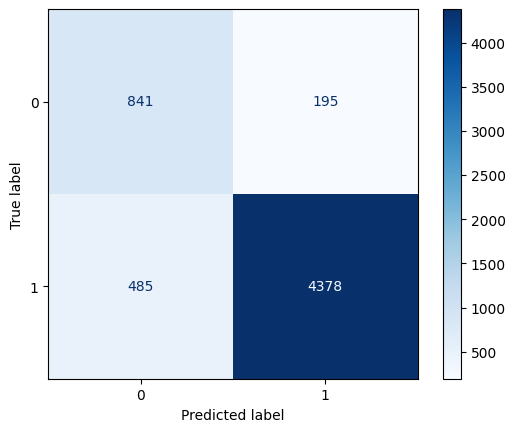

In [69]:
plot_confusion_matrix(y_test,svm_preds)

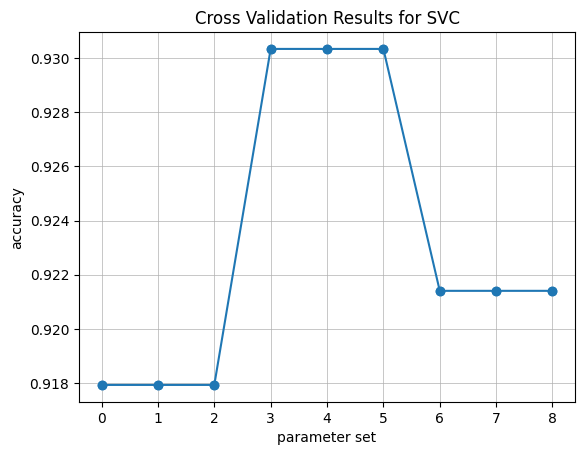

In [70]:
grid_df = pd.DataFrame(svm_grid.cv_results_)
grid_df

plt.grid(True, linewidth=0.5, linestyle='-')
plt.scatter([x for x in range(9)],grid_df.mean_test_score,)
plt.plot([x for x in range(9)],grid_df.mean_test_score,"-o")
plt.title("Cross Validation Results for SVC")
plt.xlabel("parameter set")
plt.ylabel("accuracy")

plt.show()

In [71]:
best_model_svm

SVC(C=1, class_weight='balanced', gamma=1, kernel='linear')

In [72]:
print(roc_auc_score(y_test,svm_preds))

0.8560216932363756


In [73]:
best_model_svm

SVC(C=1, class_weight='balanced', gamma=1, kernel='linear')

In [74]:
model.predict(np.round(X_manual_transformed))

1/1 [==============================] - 0s 87ms/step


array([[0.00290634]], dtype=float32)

In [75]:
np.round(model.predict(X_manual_transformed.toarray())).astype(int)

1/1 [==============================] - 0s 24ms/step


array([[0]])

XGBOOST

In [76]:
import xgboost as xgb

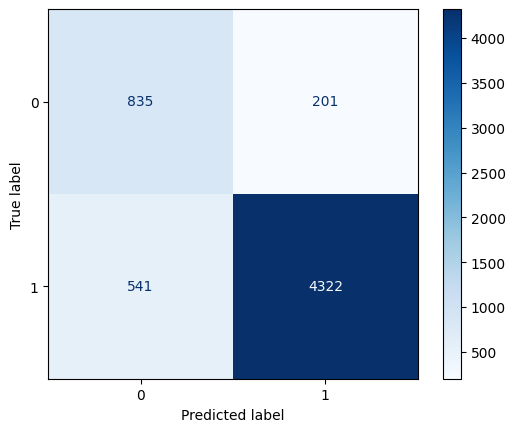

              precision    recall  f1-score   support

           0       0.61      0.81      0.69      1036
           1       0.96      0.89      0.92      4863

    accuracy                           0.87      5899
   macro avg       0.78      0.85      0.81      5899
weighted avg       0.89      0.87      0.88      5899



In [77]:
# Create an XGBoost classifier
xgb_model = xgb.XGBClassifier()

param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
   
    'subsample': [0.5, 0.75, 1.0],
    "scale_pos_weight":[1/6]

}

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='roc_auc', n_jobs=-1)

grid_search.fit(X_train_transformed,y_train)

# Get the best model
best_model_xg = grid_search.best_estimator_

# Make predictions on the test set
xg_preds = best_model_xg .predict(X_test_transformed)

plot_confusion_matrix(y_test,xg_preds)
print(classification_report(y_test, xg_preds))

In [78]:
print(roc_auc_score(y_test,xg_preds))

0.8473681776426996


In [79]:
best_model_xg.get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': None,
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'gpu_id': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': 0.2,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 300,
 'n_jobs': None,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': 0.16666666666666666,
 'subsample': 1.0,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

Voting Classifier

In [80]:
from sklearn.ensemble import VotingClassifier 

use the best parameters we found in previous gridsearchs

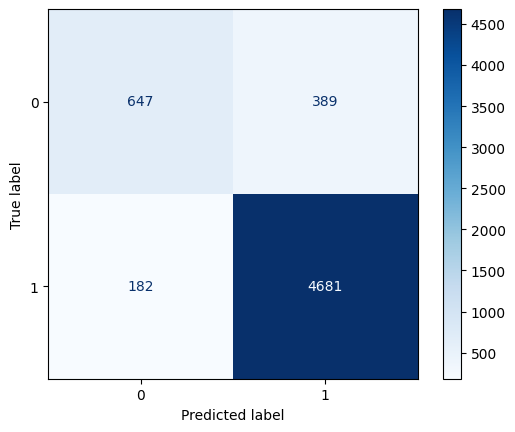

              precision    recall  f1-score   support

           0       0.78      0.62      0.69      1036
           1       0.92      0.96      0.94      4863

    accuracy                           0.90      5899
   macro avg       0.85      0.79      0.82      5899
weighted avg       0.90      0.90      0.90      5899



In [81]:
estimator = [] 
estimator.append(('LR',  
                  LogisticRegression(solver ='liblinear',  
                                     C= 1,  
                                     penalty= "l1")))
estimator.append(('SVC', SVC(kernel="linear", probability = True,class_weight="balanced"))) 
estimator.append(('NB', MultinomialNB())) 

vot_soft = VotingClassifier(estimators = estimator, voting ='hard') 
vot_soft.fit(X_train_transformed, y_train) 
y_pred_voting = vot_soft.predict(X_test_transformed) 

plot_confusion_matrix(y_test,y_pred_voting)
print(classification_report(y_test, y_pred_voting))



In [82]:
print(roc_auc_score(y_test,y_pred_voting))

0.7935459584904372


SMOTE + NEURAL NETWORK

In [83]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=101)

x_train_smote, y_train_smote = smote.fit_resample(X_train_transformed,y_train)

In [84]:
y_train_smote 
unique_values, counts = np.unique(y_train_smote , return_counts=True)
value_counts = dict(zip(unique_values, counts))

# Print the result
print("Value counts:", value_counts) #balanced

Value counts: {0: 11224, 1: 11224}


In [85]:
# Neural network model
model_smote = Sequential()
model_smote.add(Dense(256,  kernel_regularizer=l2(0.01),input_dim=x_train_smote.shape[1], activation='relu'))

model_smote.add(Dense(128, kernel_regularizer=l2(0.01), activation='relu'))

model_smote.add(Dropout(0.5))
model_smote.add(Dense(64, kernel_regularizer=l2(0.01), activation='relu'))

model_smote.add(Dropout(0.5))

model_smote.add(Dense(1, activation='sigmoid'))  

# Compile the model
model_smote.compile(optimizer="adam", loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model_smote.fit(x_train_smote.toarray(), y_train_smote, epochs=50,
          batch_size=128,
          validation_data=(X_test_transformed.toarray(), y_test))

Epoch 1/50
176/176 [==============================] - 3s 17ms/step - loss: 1.4391 - accuracy: 0.8170 - val_loss: 0.5620 - val_accuracy: 0.8883
Epoch 2/50
176/176 [==============================] - 3s 16ms/step - loss: 0.5177 - accuracy: 0.8964 - val_loss: 0.4908 - val_accuracy: 0.8908
Epoch 3/50
176/176 [==============================] - 3s 16ms/step - loss: 0.4748 - accuracy: 0.9056 - val_loss: 0.4693 - val_accuracy: 0.8930
Epoch 4/50
176/176 [==============================] - 3s 15ms/step - loss: 0.4413 - accuracy: 0.9121 - val_loss: 0.4810 - val_accuracy: 0.8813
Epoch 5/50
176/176 [==============================] - 3s 15ms/step - loss: 0.4237 - accuracy: 0.9142 - val_loss: 0.4245 - val_accuracy: 0.9024
Epoch 6/50
176/176 [==============================] - 3s 15ms/step - loss: 0.4088 - accuracy: 0.9187 - val_loss: 0.4673 - val_accuracy: 0.8740
Epoch 7/50
176/176 [==============================] - 3s 15ms/step - loss: 0.3966 - accuracy: 0.9190 - val_loss: 0.4147 - val_accuracy: 0.8973

185/185 [==============================] - 0s 2ms/step


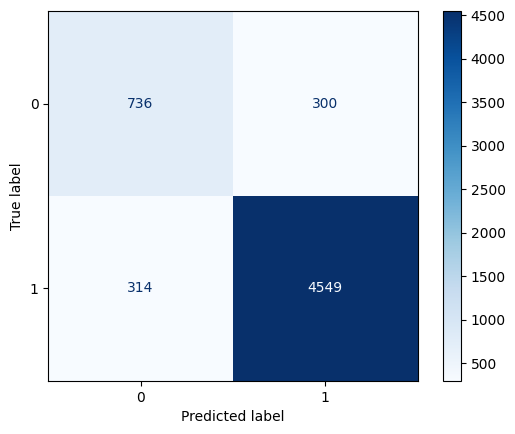

              precision    recall  f1-score   support

           0       0.70      0.71      0.71      1036
           1       0.94      0.94      0.94      4863

    accuracy                           0.90      5899
   macro avg       0.82      0.82      0.82      5899
weighted avg       0.90      0.90      0.90      5899



In [86]:
y_pred = np.round(model_smote.predict(X_test_transformed.toarray())).astype(int)
plot_confusion_matrix(y_test,y_pred )
print(classification_report(y_test, y_pred ))

In [87]:
print(roc_auc_score(y_test,y_pred))

0.8229277572275722


MODEL DEPLOYMENT

In [88]:
manual = {
"text":"The neckline is flattering but the material is awful. It’s very stiff but not compressing, so it doesn’t hold you in like other body suits. The material stretches in weird places (definitely doesn’t hug curves) and attraction a ton of hairs and fuzz. I haven’t worn this out of the house yet and the seams on the sleeves are already coming loose. Don’t waste your money on this",
"title": "  Low quality and not worth the price",
"Positive Feedback Count":0


}

In [89]:
manual_features_df = pd.DataFrame([manual])
manual_features_df

,text,title,Positive Feedback Count
0,The neckline is flattering but the material is...,Low quality and not worth the price,0


In [90]:
manual_features_df["processed_text"] = manual_features_df["text"].apply(lambda x : finalpreprocess(x))
manual_features_df["processed_title"] = manual_features_df["title"].apply(lambda x : finalpreprocess(x))
manual_features_df

,text,title,Positive Feedback Count,processed_text,processed_title
0,The neckline is flattering but the material is...,Low quality and not worth the price,0,necklin flatter materi aw stiff compress doesn...,low qualiti worth price


In [92]:
X_manual_transformed = pipeline.transform(manual_features_df[['processed_text', 'processed_title', 'Positive Feedback Count']]) #transform the manual input with pipeline and create a sparse matrix
X_manual_transformed

<1x10110 sparse matrix of type '<class 'numpy.float64'>'
	with 36 stored elements in Compressed Sparse Row format>

In [93]:
svm_grid.predict(X_manual_transformed) # as expected predicted as 0 , not recommended 

array([0], dtype=int64)